<a href="https://www.kaggle.com/code/oilgas101/fred-api-economic-analysis?scriptVersionId=96260474" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install fredapi > /dev/null

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred_api")

# 1. Create FRED object

In [4]:
fred = Fred(api_key = fred_key)

# 2. Search for economic data!

In [5]:
sp_search = fred.search('S&P',order_by = 'popularity')

In [6]:
sp_search.shape

(1000, 15)

In [7]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-05-22,2022-05-22,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-05-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-20 09:50:02-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-05-22,2022-05-22,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-04-26 08:04:02-05:00,90,"For more information regarding the index, plea..."
SP500,SP500,2022-05-22,2022-05-22,S&P 500,2012-05-21,2022-05-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-05-20 19:13:45-05:00,85,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-05-22,2022-05-22,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-05-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-20 09:50:09-05:00,84,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2022-05-22,2022-05-22,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,82,Household data are collected as of March. As ...


# 3. Pull raw data

In [8]:
sp500 = fred.get_series(series_id = 'SP500')

<AxesSubplot:title={'center':'S&P 500'}>

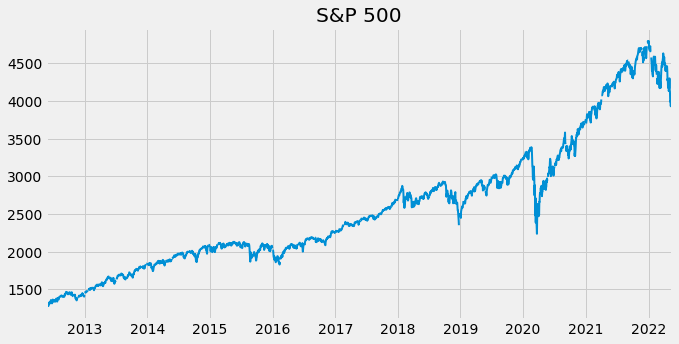

In [9]:
sp500.plot(figsize = (10,5),title = 'S&P 500', lw = 2)

# 4. Pull and Join Multiple Data Series

In [10]:
uemp_results = fred.search('unemployment')
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-05-22,2022-05-22,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-05-22,2022-05-22,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-05-06 07:43:03-05:00,54,The unemployment rate represents the number of...
NROU,NROU,2022-05-22,2022-05-22,Noncyclical Rate of Unemployment,1949-01-01,2031-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2021-02-01 14:37:05-06:00,68,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-05-22,2022-05-22,Unemployment Level,1948-01-01,2022-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-05-06 07:44:10-05:00,65,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2022-05-22,2022-05-22,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:05-05:00,67,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRHUTTTTPTA156S,LRHUTTTTPTA156S,2022-05-22,2022-05-22,Harmonized Unemployment Rate: Total: All Perso...,1983-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-10 11:40:50-06:00,1,OECD descriptor ID: LRHUTTTT OECD unit ID: STS...
LRUNTTTTNZA156N,LRUNTTTTNZA156N,2022-05-22,2022-05-22,Unemployment Rate: Aged 15 and Over: All Perso...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-02-15 11:13:17-06:00,1,OECD descriptor ID: LRUNTTTT OECD unit ID: ST ...
LRUNTTTTNZA156S,LRUNTTTTNZA156S,2022-05-22,2022-05-22,Unemployment Rate: Aged 15 and Over: All Perso...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-02-15 11:13:16-06:00,1,OECD descriptor ID: LRUNTTTT OECD unit ID: STS...


<AxesSubplot:>

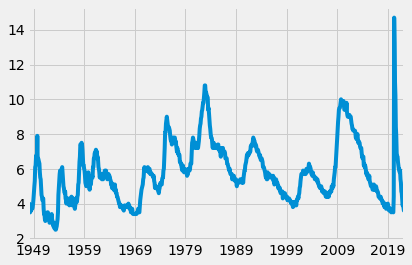

In [11]:
unrate = fred.get_series('UNRATE')
unrate.plot()

In [12]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_rate_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')
unemp_rate_df = unemp_rate_df.loc[unemp_rate_df['title'].str.contains('Unemployment Rate in')]

unemp_rate_df['title']
unemp_rate_df.shape

(57, 15)

In [13]:
all_results = []
for myid in unemp_rate_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
    
unemp_results = pd.concat(all_results, axis =1).drop(['LASMT261982000000003','LASMT391746000000003'],axis =1)

In [14]:
unemp_results.isna().sum(axis =1)
unemp_states = unemp_results.drop(['DCUR','CNERUR','CMWRUR', 'CWSTUR'],axis =1)
unemp_states.index
id_to_state = unemp_rate_df['title'].str.replace('Unemployment Rate in','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [15]:
import plotly.express as px

px.line(unemp_states)

## Pull April 2020 Unemployment Rate Per State

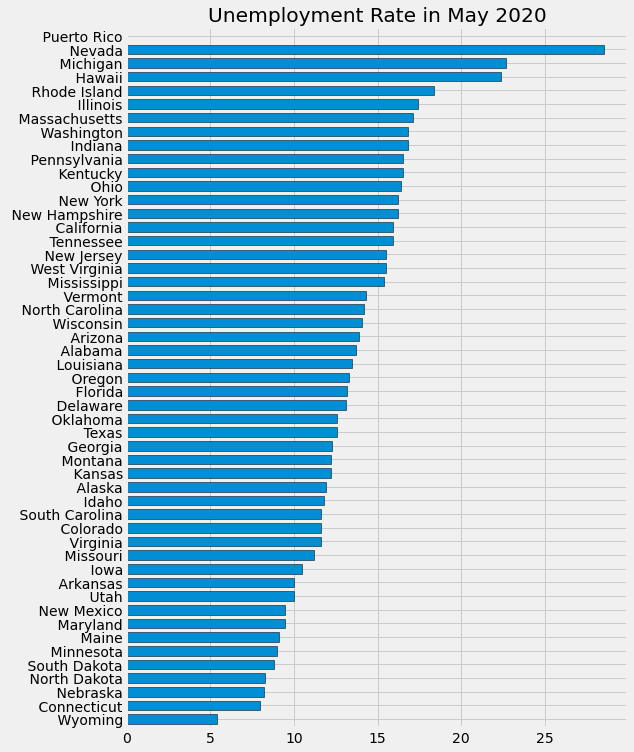

In [16]:
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T.sort_values('2020-04-01')\
.plot(kind = 'barh',figsize=(8,12), width = 0.7, edgecolor = 'black',title = "Unemployment Rate in May 2020")
ax.legend().remove()

# Pull Participation Rate

In [17]:
part_df = fred.search('participation rate state', filter = ('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]
part_df.shape

(51, 15)

In [18]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()

all_results = []
for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
    
part_states = pd.concat(all_results, axis =1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]


# Plot Unemployment vs Participation

<AxesSubplot:>

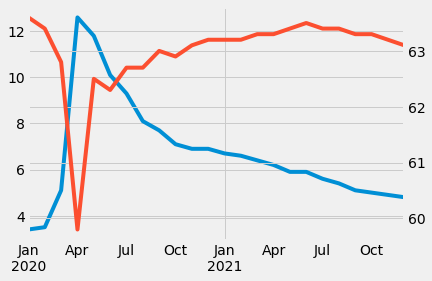

In [19]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >=2020 and index <2022')[' Texas'].plot(ax=ax, label = 'Unemployment')
part_states.query('index >=2020 and index <2022')[' Texas'].plot(ax = ax2, label = 'Participation', color = color_pal[1])

In [20]:
unemp_states.shape

(555, 51)

In [21]:
part_states.shape

(556, 51)

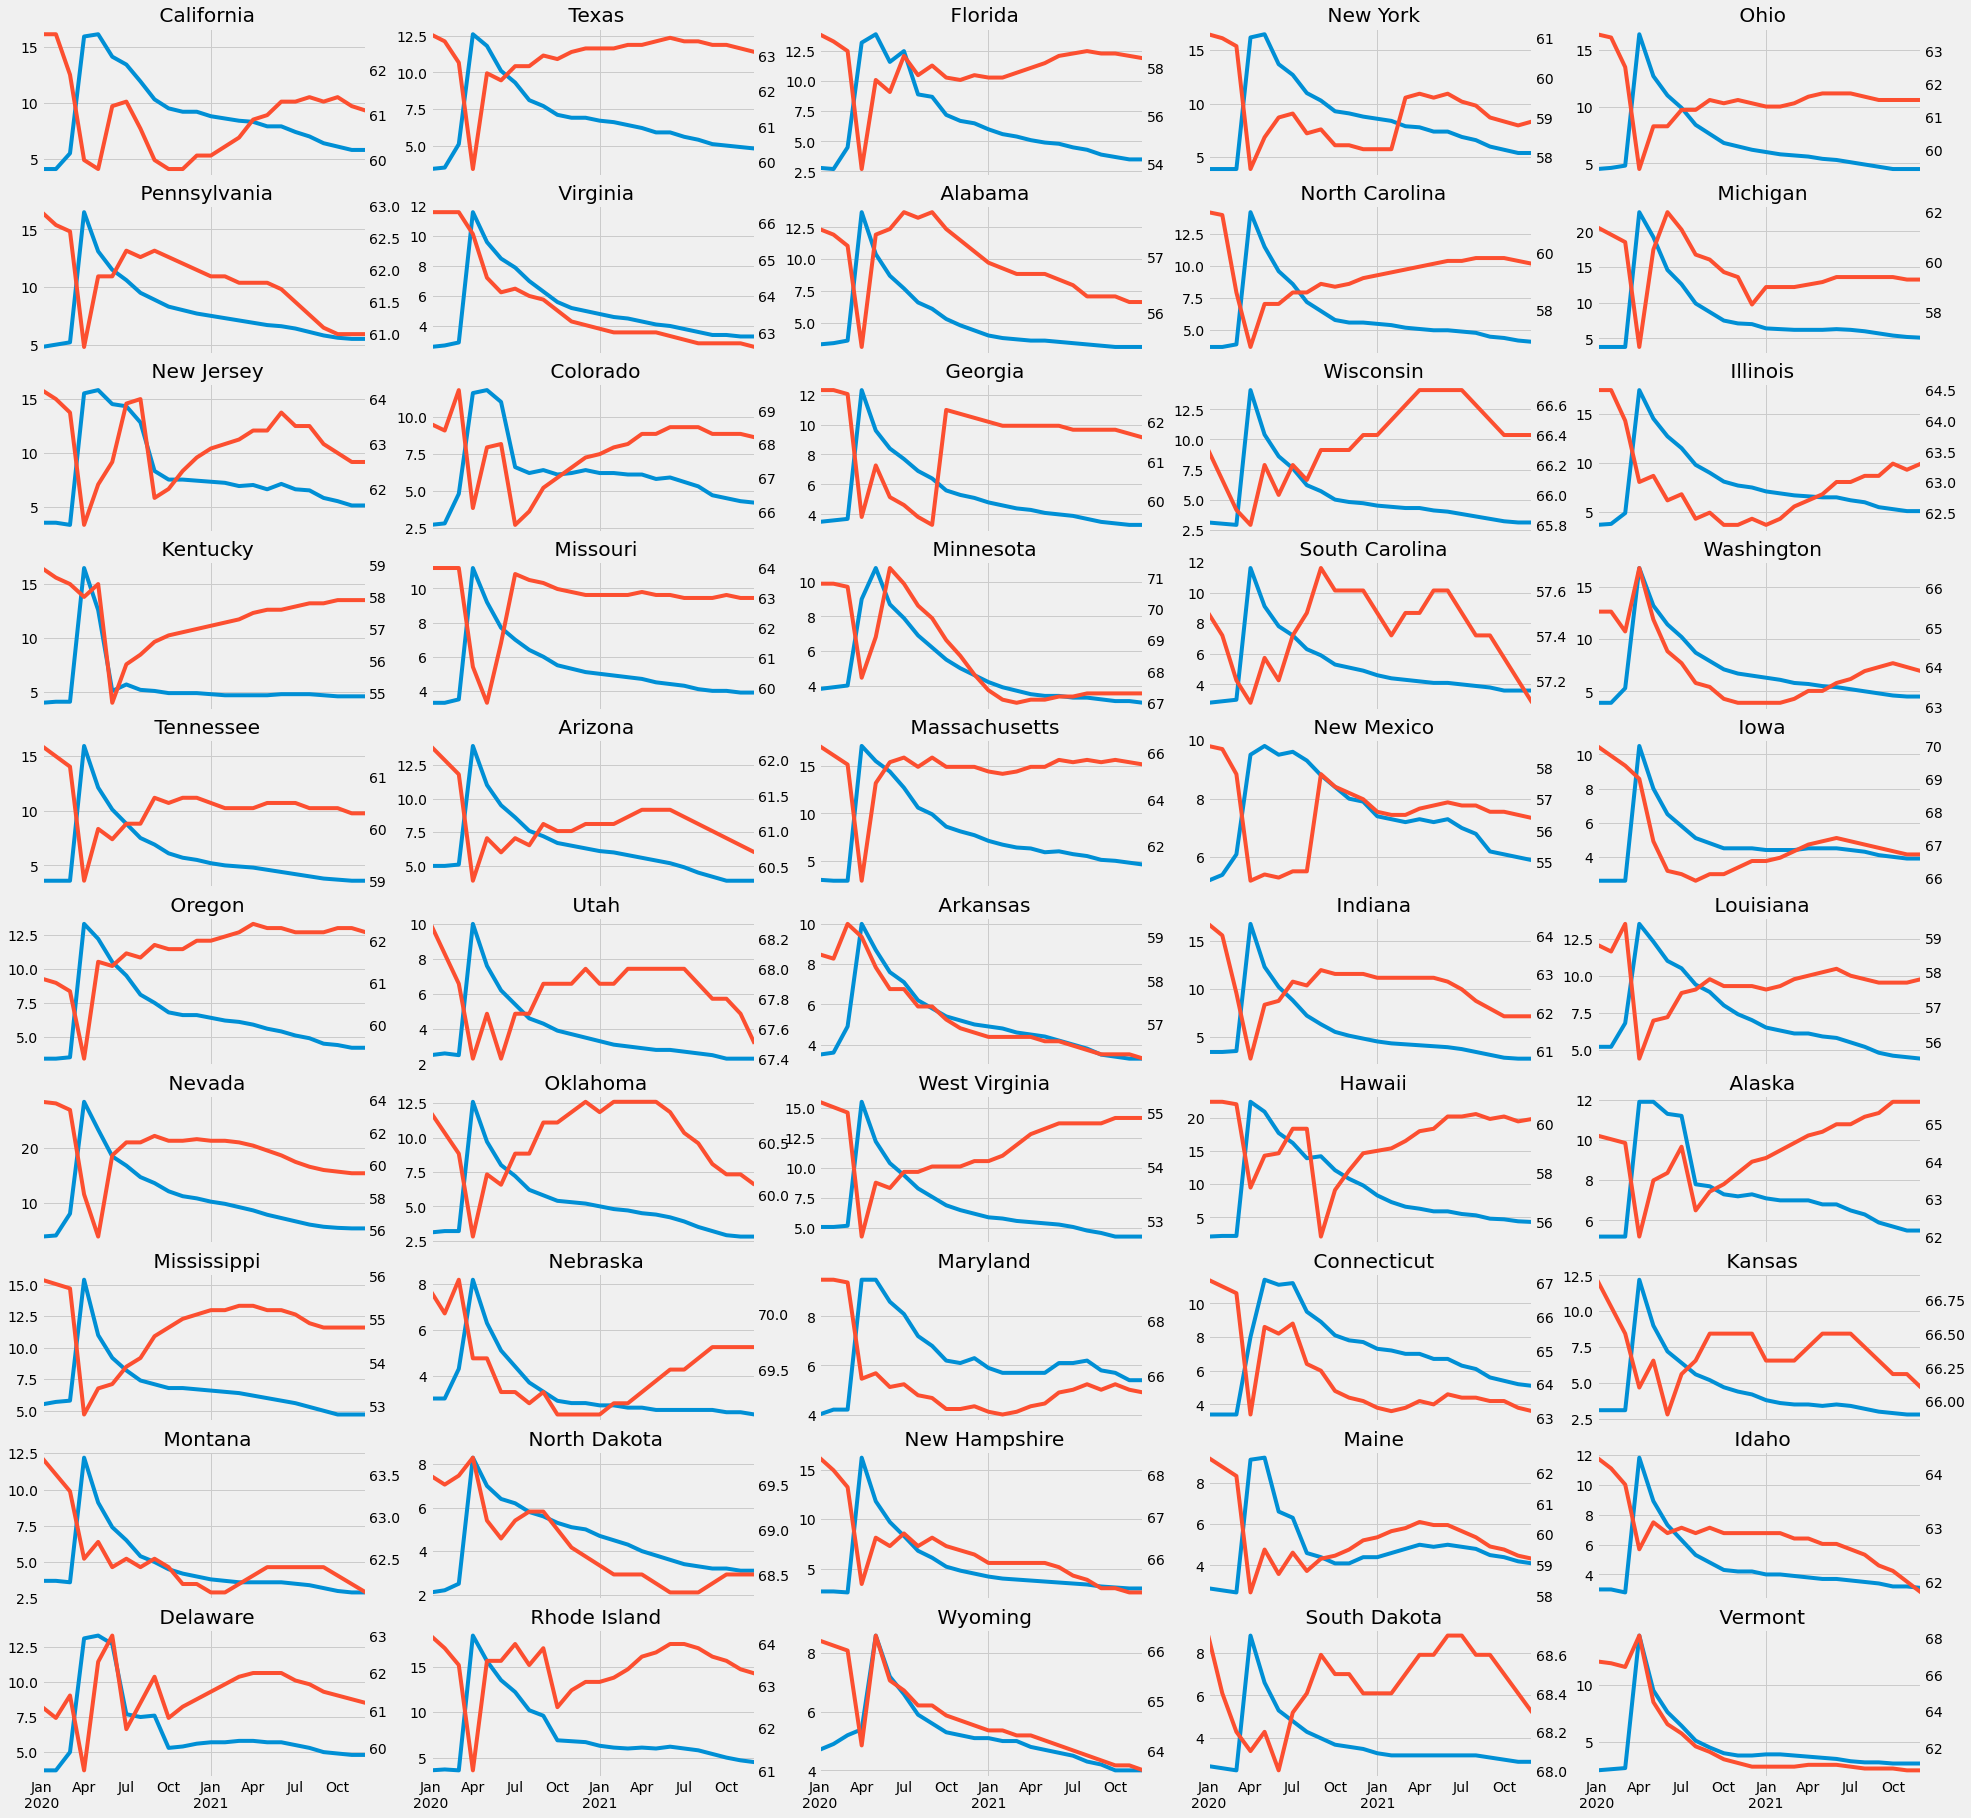

In [22]:
fig,axs = plt.subplots(10,5,figsize = (30,30), sharex = True)
axs = axs.flatten()

i=0
for state in unemp_states.columns:
    if state == ' Puerto Rico':
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >=2020 and index <2022')[state].plot(ax=axs[i], label = 'Unemployment')
    part_states.query('index >=2020 and index <2022')[state].plot(ax = ax2, label = 'Participation', color = color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i +=1
plt.tight_layout
plt.show()

# The End
# More explortion!!!